## 2D Convolution

Now we can start working with images!! The **2D** convolution consists of moving a kernel along the data, this time being able to move in two dimensions. Likewise, the kernel can also have two dimensions.

In [23]:
# imports the libraries necessary for image processing.

from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

Let's assume that we are looking to **detect edges in images**. We will use the image of a brick wall as an example:
```python
img = data.brick()
```

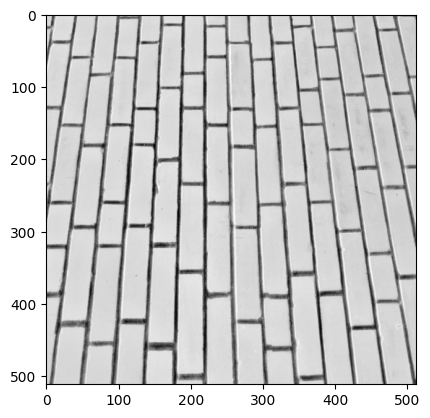

In [24]:
img = data.brick()
plt.imshow(img, cmap='Greys')

To help us from now on, let's define a method to print the kernels as images.

In [25]:
# This function displays a grayscale image with the specified values.

def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

Let's now define two different kernels:
* Kernel of **vertical** edges
* Kernel of **horizontal** edges

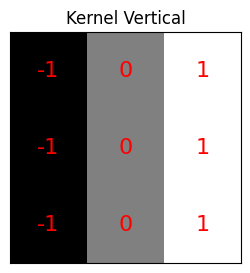

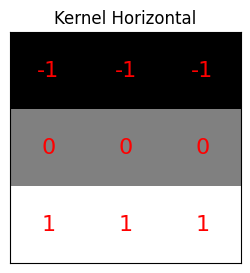

In [26]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

# This kernel is used to apply a vertical filter to the image.
show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]

# This kernel is used to apply a horizontal filter to the image.
show(kernel_h, 'Kernel Horizontal')

Let us now convolve both kernels with the brick wall and observe the result. Each kernel will highlight different parts of the image!!

The result of the convolution between the data and the kernel is called **Feature Map** or **Activation Map**.

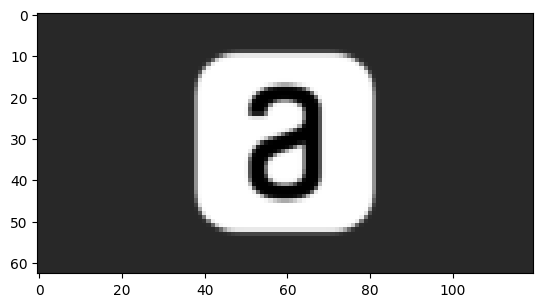

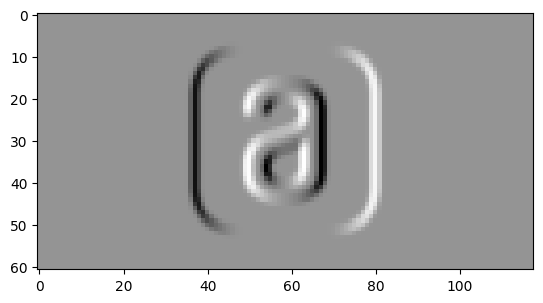

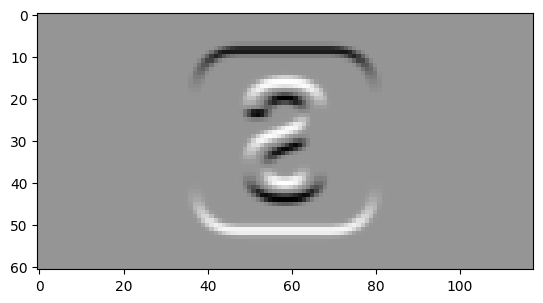

In [31]:
# Apply the vertical Sobel edge detection kernel

mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

# Display the edge detection result

plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

### A note about activations

When we define the kernel, it will look for the default for which it was defined, but it is worth taking a closer look at its behavior.
Let's print the original kernel, and its inverted version that is actually operated on with the image during convolution.

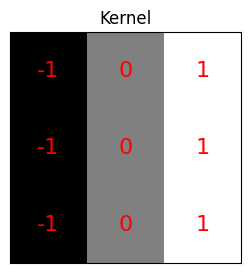

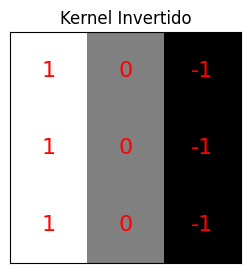

In [28]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Invertido')

Let's apply this kernel to an image you may be familiar with. The logo of an online course company in technology and digital marketing!

In [29]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

--2024-01-03 21:58:44--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.37.28.25, 2600:1407:7400:584::2a1, 2600:1407:7400:589::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.37.28.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30438 (30K) [image/png]
Saving to: ‘1200x630wa.png.2’

1200x630wa.png.2    100%[===================>]  29.72K  --.-KB/s    in 0.01s   

2024-01-03 21:58:44 (2.62 MB/s) - ‘1200x630wa.png.2’ saved [30438/30438]



Text(0.5, 1.0, 'Mapa de ativação')

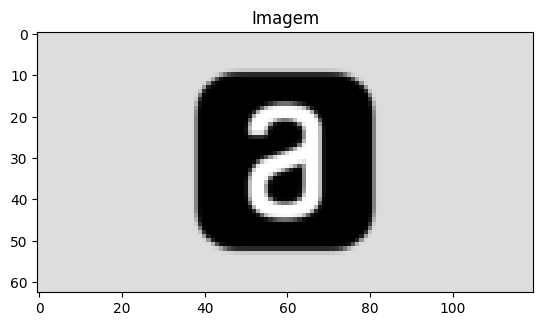

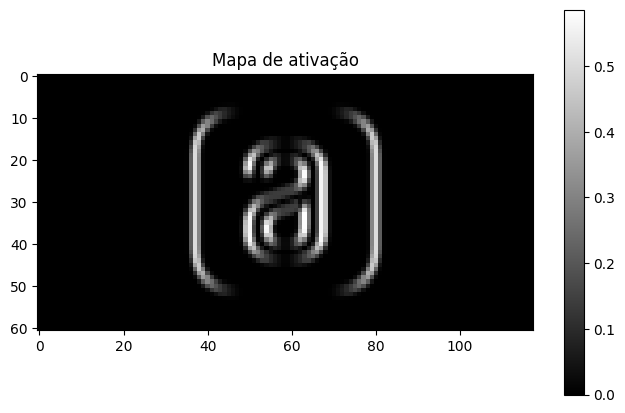

In [32]:
# This code applies a Sobel filter to an image.

img = io.imread('1200x630wa.png')
img = img[:,:,:3]  # Ignora o canal alfa
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10))

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')


Note that the absolute value of kernel activation is high when it finds a good match for its pattern, but also when it finds the opposite pattern to the one it loads. In the latter case, its activation has a negative sign.